# Pokeymans

In [2]:
import pandas as pd # bamboo
from matplotlib import pyplot as plt # boring
%matplotlib inline
import seaborn as sns # Poseidon
#unHelpFulComments

In [3]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

In [4]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


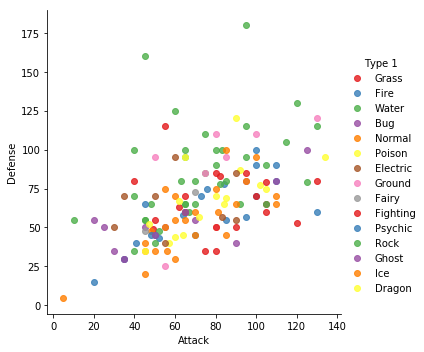

In [17]:
#Scatter Plot
sns.lmplot(x='Attack', y='Defense', data=df, 
           hue='Type 1', 
#            markers=['o','x','v'],
           palette='Set1',
           fit_reg=False,
          )

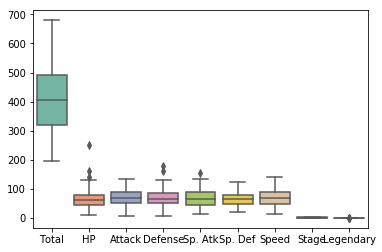

In [18]:
sns.boxplot(data=df, palette='Set2')

In [21]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1) #drops named columns
stats_df.head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80
6,Charizard,Fire,Flying,78,84,78,109,85,100
7,Squirtle,Water,NaN,44,48,65,50,64,43
8,Wartortle,Water,NaN,59,63,80,65,80,58
9,Blastoise,Water,NaN,79,83,100,85,105,78


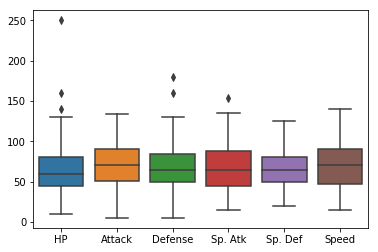

In [22]:
sns.boxplot(data=stats_df)

In [23]:
sns.set_style('whitegrid')

/Users/fby/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


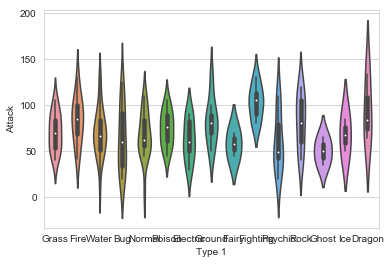

In [24]:
sns.violinplot(x='Type 1', y='Attack', data=df)

/Users/fby/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


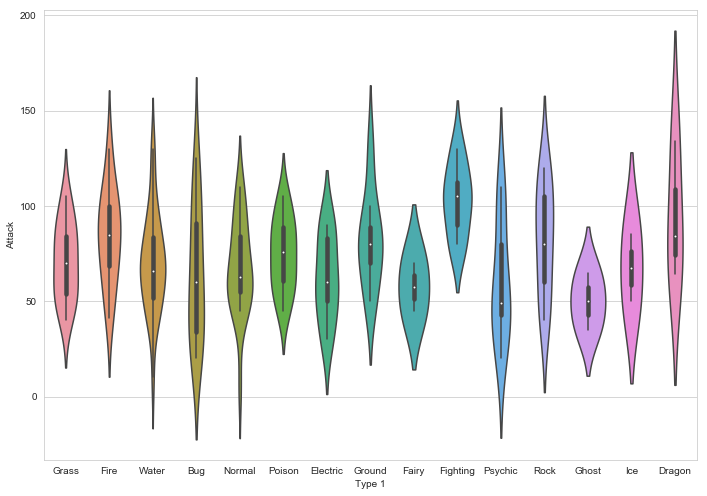

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x='Type 1', y='Attack', data=df, ax=ax)

In [29]:
print(stats_df.head(), stats_df.shape)

         Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
#                                                                         
1   Bulbasaur  Grass  Poison  45      49       49       65       65     45
2     Ivysaur  Grass  Poison  60      62       63       80       80     60
3    Venusaur  Grass  Poison  80      82       83      100      100     80
4  Charmander   Fire     NaN  39      52       43       60       50     65
5  Charmeleon   Fire     NaN  58      64       58       80       65     80 (151, 9)


In [30]:
melted_df = pd.melt(stats_df,
                   id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                   var_name="Stat" # Name of melted variable
                   )
print(melted_df.head(), melted_df.shape)

         Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58 (906, 5)


In [28]:
melted_df.sort_values(by='Name', ascending=True).head(10)

,Name,Type 1,Type 2,Stat,value
364,Abra,Psychic,NaN,Defense,15
213,Abra,Psychic,NaN,Attack,20
817,Abra,Psychic,NaN,Speed,90
666,Abra,Psychic,NaN,Sp. Def,55
515,Abra,Psychic,NaN,Sp. Atk,105
62,Abra,Psychic,NaN,HP,25
443,Aerodactyl,Rock,Flying,Defense,65
594,Aerodactyl,Rock,Flying,Sp. Atk,60
745,Aerodactyl,Rock,Flying,Sp. Def,75
292,Aerodactyl,Rock,Flying,Attack,105


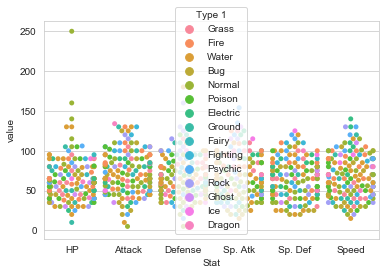

In [31]:
# Swarm Plot
sns.swarmplot(x='Stat', y='value',
             data=melted_df, hue='Type 1')

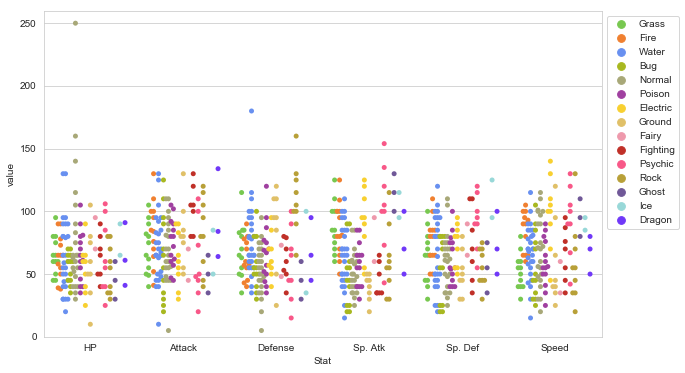

In [32]:
# Swarm Plot better looking
plt.figure(figsize=(10,6))

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.swarmplot(x='Stat', y='value',
             data=melted_df, hue='Type 1',
             dodge=True, # separate points by hue (used to be called 'split')
             palette=pkmn_type_colors # use pokemon palette
             )
plt.ylim(0, 260)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

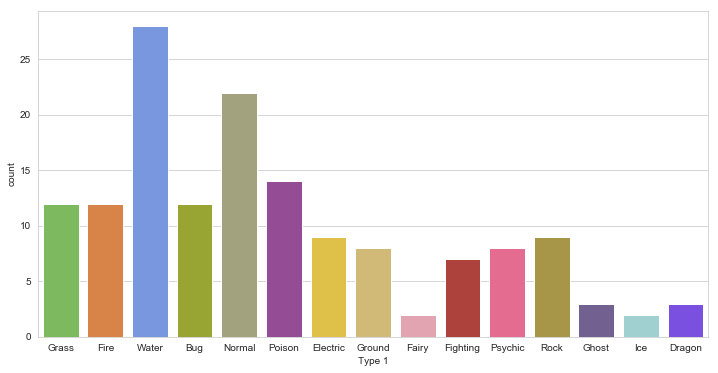

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

In [34]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
# %load_ext autoreload
# %autoreload 2

In [35]:
df[['Attack','Defense']]

,Attack,Defense
#,,
1,49,49
2,62,63
3,82,83
4,52,43
5,64,58
6,84,78
7,48,65
8,63,80
9,83,100


In [39]:
trace0 = Scatter(x=df['Attack'],
                y=df['Defense'],
                mode='markers',
                text=df['Name'])

data = [trace0]
layout = Layout(showlegend=False,
               height=600,
               width=600)
fig = dict(data=data, layout=layout)
iplot(fig)

/Users/fby/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



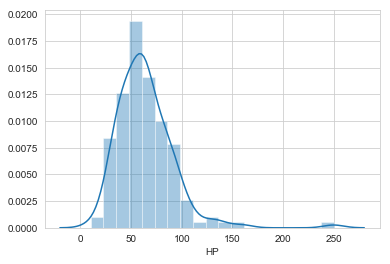

In [41]:
sns.distplot(stats_df['HP'])